# Guia 1: Macroeconomia II 

## Problema de la Torta 

#### Autor: Cristobal Donoso

*last update: 11/08/2025*

In [1]:
from util import go_to_project_root
go_to_project_root()

import matplotlib.pyplot as plt
import numpy as np

from src.utility import rootsquare
from src.models import DeterministicCakeEating, StochasticCakeEating
from src.solver import ValueFunctionIterator
from src.plot import plot_deterministic, plot_stochastic

%load_ext autoreload
%autoreload 2

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"], # Fuente clásica de LaTeX
})

CWD changed to the project root: /home/epsilon/Documents/doctorado/S2/ENECO670/guias/bellman_opt


## Pregunta II

In [2]:
deterministic_model = DeterministicCakeEating(beta=0.98, utility_func=rootsquare)
solver_det = ValueFunctionIterator(model=deterministic_model)
solution_det = solver_det.solve(state_grids={'W': np.linspace(1e-2, 10, 1000)}, 
                                control_grids={'c': np.linspace(1e-2, 10, 1000)},
                                tolerance=1e-6, 
                                max_iter=200)

Iterating on V:   0%|          | 0/200 [00:00<?, ?it/s]

Converged in 127 iterations:  63%|██████▎   | 126/200 [00:02<00:01, 44.78it/s, dist=0.00e+00]


/tmp/ipykernel_348003/1963514066.py:3: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


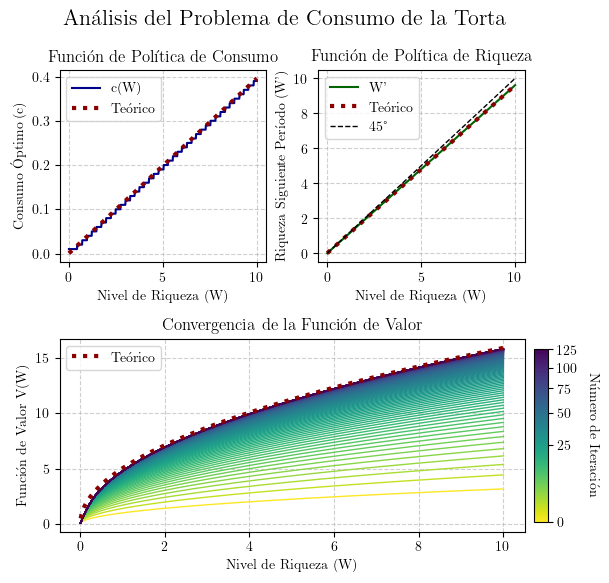

In [3]:
fig = plt.figure(figsize=(6, 6), dpi=100)
fig = plot_deterministic(solution_det, fig=fig, save='./presentation/figures/p2.pdf')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Pregunta III

In [4]:
params = {'P': np.array([[0.8, 0.2],  
                         [0.25, 0.75]])
}

state_grids = {'W': np.linspace(1e-2, 10, 1000), 
               'epsilon': np.array([0.9, 1.1])}
control_grids = {'c': np.linspace(1e-2, 10, 1000)}

In [5]:
stochastic_model = StochasticCakeEating(
    beta=0.98,
    utility_func=rootsquare,
    params=params
)

solver_sto = ValueFunctionIterator(model=stochastic_model)
solution_sto = solver_sto.solve(state_grids, 
                                control_grids, 
                                tolerance=1e-6, 
                                max_iter=210)


Iterating on V:   0%|          | 0/210 [00:00<?, ?it/s]

Converged in 201 iterations:  95%|█████████▌| 200/210 [00:12<00:00, 16.00it/s, dist=9.72e-07]


/home/epsilon/Documents/doctorado/S2/ENECO670/guias/bellman_opt/src/plot.py:132: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax_vfi.legend()
/home/epsilon/Documents/doctorado/S2/ENECO670/guias/bellman_opt/src/plot.py:135: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax_vfi.legend()
/tmp/ipykernel_348003/531852065.py:3: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


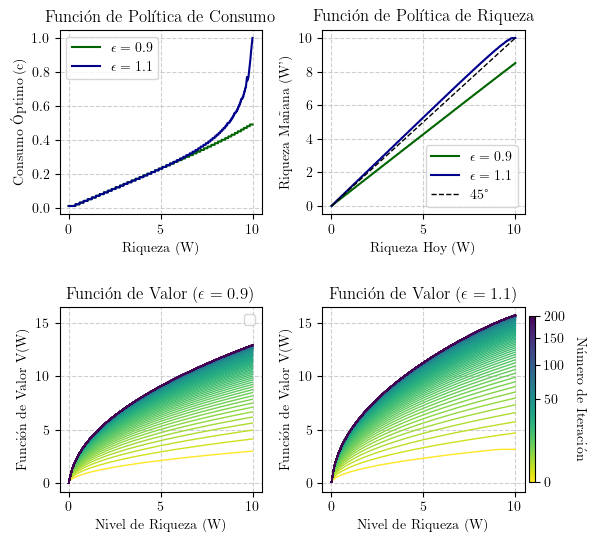

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(6, 6), gridspec_kw={'hspace':0.5, 'wspace':0.3}, dpi=100)
fig = plot_stochastic(solution_sto, fig=fig, axes=axes, save='./presentation/figures/p3.pdf')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()